<a href="https://colab.research.google.com/github/nativodf/tcc_teste/blob/main/tcc_edo_solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensor(0.0003, grad_fn=<MeanBackward0>)
tensor(7.2095e-06, grad_fn=<MeanBackward0>)
tensor(7.2095e-06, grad_fn=<MeanBackward0>)
tensor(7.2095e-06, grad_fn=<MeanBackward0>)
tensor(7.2095e-06, grad_fn=<MeanBackward0>)
tensor(7.2095e-06, grad_fn=<MeanBackward0>)
tensor(7.2095e-06, grad_fn=<MeanBackward0>)
tensor(7.2095e-06, grad_fn=<MeanBackward0>)
tensor(7.2095e-06, grad_fn=<MeanBackward0>)
tensor(7.2095e-06, grad_fn=<MeanBackward0>)


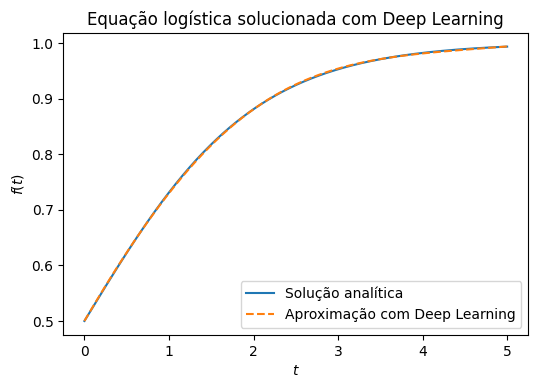

In [ ]:
#primeira ordem
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

## check if GPU is available and use it; otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

N = nn.Sequential(nn.Linear(1, 100), nn.Sigmoid(), nn.Linear(100,1, bias=False))
A = 0.5
Psi_t = lambda x: A + x * N(x)
f = lambda x,Psi: Psi*(1-Psi) # torch.exp(-x / 5.0) * torch.cos(x) - Psi / 5.0                        
def loss(x): 

    x.requires_grad = True
    outputs = Psi_t(x)
    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs),
                        create_graph=True)[0]
  #  print("loss:", torch.mean( ( Psi_t_x - hh )  ** 2))
    return  torch.mean( ( Psi_t_x - f(x,outputs) )  ** 2)
optimizer = torch.optim.LBFGS(N.parameters())
x = torch.Tensor(np.linspace(0, 5, 1000)[:, None])


def closure():

    optimizer.zero_grad() #grad zerado para não gerar acumulações errôneas
    l = loss(x)
    l.backward()
    
    return l

for i in range(10):
    optimizer.step(closure)
    print(closure())
xx = np.linspace(0, 5, 1000)[:, None]

with torch.no_grad():
    yy = Psi_t(torch.Tensor(xx)).numpy()
yt = 1/(1+np.exp(-xx)) #np.exp(xx)/(np.exp(xx)+1)           #np.exp(-xx / 5.0) * np.sin(xx)

fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label='Solução analítica')
ax.plot(xx, yy, '--', label='Aproximação com Deep Learning')
ax.set_xlabel('$t$')
ax.set_ylabel('$f(t)$')
ax.set_title('Equação logística solucionada com Deep Learning')
plt.legend(loc='best');

média valor de perda final = 6.741945071553346e-08


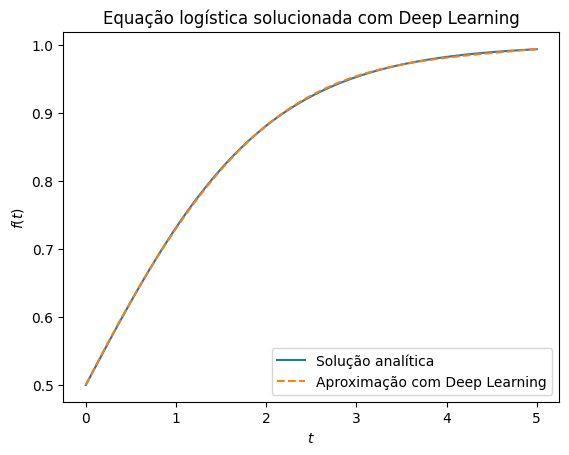

In [13]:
#primeira ordem: interacao ordem
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
idx=0
closure_collect = np.zeros(100)
## check if GPU is available and use it; otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
while idx<100:

  N = nn.Sequential(nn.Linear(1, 10), nn.Sigmoid(), nn.Linear(10,1, bias=False))
  A = 0.5
  Psi_t = lambda x: A + x * N(x)
  f = lambda x,Psi: Psi*(1-Psi) # torch.exp(-x / 5.0) * torch.cos(x) - Psi / 5.0                        
  def loss(x): 

    x.requires_grad = True
    outputs = Psi_t(x)
    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs),
                        create_graph=True)[0]
  #  print("loss:", torch.mean( ( Psi_t_x - hh )  ** 2))
    return  torch.mean( ( Psi_t_x - f(x,outputs) )  ** 2)
  optimizer = torch.optim.LBFGS(N.parameters())
  x = torch.Tensor(np.linspace(0, 5, 1000)[:, None])


  def closure():

    optimizer.zero_grad() #grad zerado para não gerar acumulações errôneas
    l = loss(x)
    l.backward()
    
    return l

  for i in range(20):
    optimizer.step(closure)
  xx = np.linspace(0, 5, 1000)[:, None]

  with torch.no_grad():
    yy = Psi_t(torch.Tensor(xx)).numpy()
  yt = 1/(1+np.exp(-xx)) #np.exp(xx)/(np.exp(xx)+1)           #np.exp(-xx / 5.0) * np.sin(xx)
  if idx==99:
    fig, ax = plt.subplots(dpi=100)
    ax.plot(xx, yt, label='Solução analítica')
    ax.plot(xx, yy, '--', label='Aproximação com Deep Learning')
    ax.set_xlabel('$t$')
    ax.set_ylabel('$f(t)$')
    ax.set_title('Equação logística solucionada com Deep Learning')
    plt.legend(loc='best');
  closure_collect[i] = closure().item()
  idx=idx+1
print('média valor de perda final =', np.mean(closure_collect))

tensor(0.4045, grad_fn=<MeanBackward0>)
tensor(0.0124, grad_fn=<MeanBackward0>)
tensor(0.0008, grad_fn=<MeanBackward0>)
tensor(5.7726e-05, grad_fn=<MeanBackward0>)
tensor(3.9179e-06, grad_fn=<MeanBackward0>)
tensor(2.6802e-07, grad_fn=<MeanBackward0>)
tensor(1.9827e-08, grad_fn=<MeanBackward0>)
tensor(2.0437e-09, grad_fn=<MeanBackward0>)
tensor(1.0545e-09, grad_fn=<MeanBackward0>)
tensor(1.0545e-09, grad_fn=<MeanBackward0>)


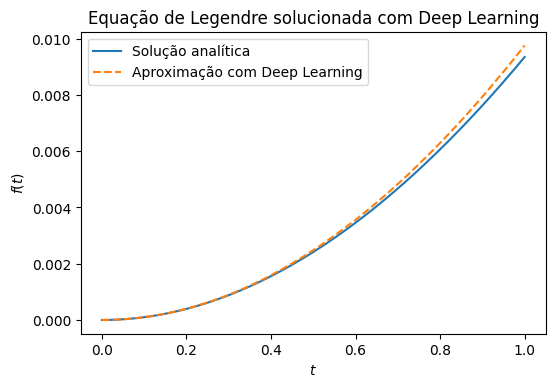

In [ ]:
#sistema
from matplotlib.backend_bases import NavigationToolbar2
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

## check if GPU is available and use it; otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

N = nn.Sequential(nn.Linear(1, 50), nn.Sigmoid(), nn.Linear(50,1, bias=False))
N2 = nn.Sequential(nn.Linear(1, 50), nn.Sigmoid(), nn.Linear(50,1, bias=False))

A = 0
A2 = 0

Psi_t = lambda x: A + x * N(x)                 #pra implementar f
Psi_t_2 = lambda x: A2 + x * N2(x)             #pra implementar f2

f = lambda x, Xi, Psi: Psi                         # y'  =  w
f2 = lambda x, Xi, Psi: 1/50 - Xi/5 - Psi/50                  # w'  = -w-1

                      
def loss(x): 

    x.requires_grad = True

    outputs2 = Psi_t_2(x)
    outputs = Psi_t(x)
    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs),
                        create_graph=True)[0]
    Psi_t_x_2 = torch.autograd.grad(outputs2, x, grad_outputs=torch.ones_like(outputs2),
                        create_graph=True)[0]

  #  print("loss:", torch.mean( ( Psi_t_x - hh )  ** 2))
    return  torch.mean( torch.mean( ( Psi_t_x - f(x,outputs,outputs2) )  ** 2) + torch.mean((Psi_t_x_2 - f2(x,outputs,outputs2)) ** 2) )
optimizer = torch.optim.LBFGS(N.parameters())
optimizer2 = torch.optim.LBFGS(N2.parameters())
x = torch.Tensor(np.linspace(0, 1, 15000)[:, None])

def closure():

    optimizer.zero_grad() #grad zerado para não gerar acumulações errôneas
    optimizer2.zero_grad()
    l = loss(x)
    l.backward()
    
    return l

for i in range(10):
    print(closure())
    optimizer.step(closure)
    optimizer2.step(closure)
xx = np.linspace(0, 1, 15000)[:, None]

with torch.no_grad():
    yy = Psi_t(torch.Tensor(xx)).numpy()
yt = np.exp(-xx/10) * (np.exp(xx/10) - np.sin(xx/10) - np.cos(xx/10))      #-xx + 4*np.exp(-xx/2)*np.sin(np.sqrt(3)/2 * xx)/np.sqrt(3) + 1

fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label='Solução analítica')
ax.plot(xx, yy, '--', label='Aproximação com Deep Learning')
ax.set_xlabel('$t$')
ax.set_ylabel('$f(t)$')
ax.set_title('Equação de Legendre solucionada com Deep Learning')
plt.legend(loc='best');

20
tensor(8.6353e-08, grad_fn=<MeanBackward0>)
tensor(8.6353e-08, grad_fn=<MeanBackward0>)
tensor(8.6353e-08, grad_fn=<MeanBackward0>)
tensor(8.6353e-08, grad_fn=<MeanBackward0>)
tensor(8.6353e-08, grad_fn=<MeanBackward0>)
tensor(8.6353e-08, grad_fn=<MeanBackward0>)
tensor(8.6353e-08, grad_fn=<MeanBackward0>)
tensor(8.6353e-08, grad_fn=<MeanBackward0>)
tensor(8.6353e-08, grad_fn=<MeanBackward0>)
tensor(8.6353e-08, grad_fn=<MeanBackward0>)
30
tensor(2.8579e-06, grad_fn=<MeanBackward0>)
tensor(2.8579e-06, grad_fn=<MeanBackward0>)
tensor(2.8579e-06, grad_fn=<MeanBackward0>)
tensor(2.8579e-06, grad_fn=<MeanBackward0>)
tensor(2.8579e-06, grad_fn=<MeanBackward0>)
tensor(2.8579e-06, grad_fn=<MeanBackward0>)
tensor(2.8579e-06, grad_fn=<MeanBackward0>)
tensor(2.8579e-06, grad_fn=<MeanBackward0>)
tensor(2.8579e-06, grad_fn=<MeanBackward0>)
tensor(2.8579e-06, grad_fn=<MeanBackward0>)
50
tensor(7.0315e-08, grad_fn=<MeanBackward0>)
tensor(7.0315e-08, grad_fn=<MeanBackward0>)
tensor(7.0315e-08, grad

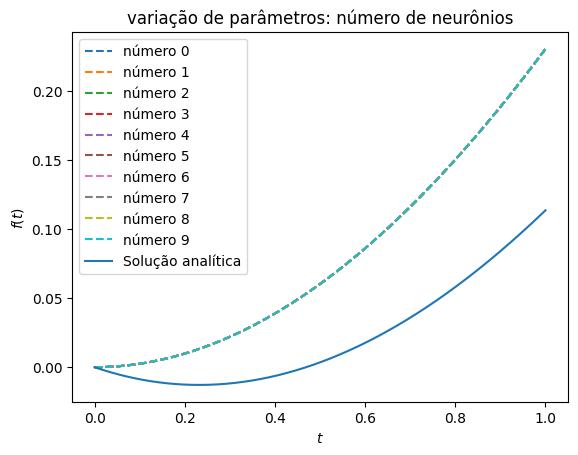

In [19]:
#teste de parâmetro 2 ordem: numero de neuronios
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
idx=0
fig, ax = plt.subplots(dpi=100)
while idx < 10:
  ## check if GPU is available and use it; otherwise use CPU
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  parametro_a_variar = [20, 30, 50, 70, 100, 120,150,200,250,300] 
  N = nn.Sequential(nn.Linear(1, parametro_a_variar[idx]), nn.Sigmoid(), nn.Linear(parametro_a_variar[idx],1, bias=False))
  print(parametro_a_variar[idx])
  A  = 0
  A2 = 0
  Psi_t = lambda x: A + A2*x + x ** 2 * N(x)
  f = lambda x,Xi,Psi:  1/2 - Xi/5 - Psi/5 #(0.5 - Xi - Psi*100)/10 # torch.exp(-x / 5.0) * torch.cos(x) - Psi / 5.0                        
  def loss(x):

    x.requires_grad = True
    outputs = Psi_t(x)

    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs),
                                            create_graph=True)[0]
    Psi_t_x_x = torch.autograd.grad(Psi_t_x, x, grad_outputs=torch.ones_like(Psi_t_x),
                                            create_graph=True )[0]

    return torch.mean((Psi_t_x_x - f(x,outputs,Psi_t_x)) ** 2)


  optimizer = torch.optim.LBFGS(N.parameters())
  x = torch.Tensor(np.linspace(0, 1, 1000)[:, None])


  def closure():

    optimizer.zero_grad() #grad zerado para não gerar acumulações errôneas
    l = loss(x)
    l.backward()
    
    return l

  for i in range(10):
    optimizer.step(closure)
    print(closure())
  xx = np.linspace(0, 1, 1000)[:, None]

  legenda_plot = "número " + str(idx)
  ax.plot(xx, yy, '--', label=legenda_plot)
  ax.set_xlabel('$t$')
  ax.set_ylabel('$f(t)$')
  idx=idx+1

with torch.no_grad():
    yy = Psi_t(torch.Tensor(xx)).numpy()
yt = 1/38 * np.exp(-xx/10) * (-np.sqrt(95)*np.sin( np.sqrt(19)*xx/10 ) - 95 * np.cos(np.sqrt(19)/10 * xx) + 95) #0.5 + 0.000501505* np.exp(-9.98999* xx) - 0.500502 *np.exp(-0.01001* xx)
ax.plot(xx, yt, label='Solução analítica')
ax.set_title('variação de parâmetros: número de neurônios')
plt.legend(loc='best');

5
tensor(5.3513e-08, grad_fn=<MeanBackward0>)
tensor(5.3513e-08, grad_fn=<MeanBackward0>)
tensor(5.3513e-08, grad_fn=<MeanBackward0>)
tensor(5.3513e-08, grad_fn=<MeanBackward0>)
tensor(5.3513e-08, grad_fn=<MeanBackward0>)
10
tensor(2.1182e-06, grad_fn=<MeanBackward0>)
tensor(1.7032e-07, grad_fn=<MeanBackward0>)
tensor(1.7032e-07, grad_fn=<MeanBackward0>)
tensor(1.7032e-07, grad_fn=<MeanBackward0>)
tensor(1.7032e-07, grad_fn=<MeanBackward0>)
tensor(1.7032e-07, grad_fn=<MeanBackward0>)
tensor(1.7032e-07, grad_fn=<MeanBackward0>)
tensor(1.7032e-07, grad_fn=<MeanBackward0>)
tensor(1.7032e-07, grad_fn=<MeanBackward0>)
tensor(1.7032e-07, grad_fn=<MeanBackward0>)
15
tensor(3.9084e-07, grad_fn=<MeanBackward0>)
tensor(3.9084e-07, grad_fn=<MeanBackward0>)
tensor(3.9084e-07, grad_fn=<MeanBackward0>)
tensor(3.9084e-07, grad_fn=<MeanBackward0>)
tensor(3.9084e-07, grad_fn=<MeanBackward0>)
tensor(3.9084e-07, grad_fn=<MeanBackward0>)
tensor(3.9084e-07, grad_fn=<MeanBackward0>)
tensor(3.9084e-07, grad_

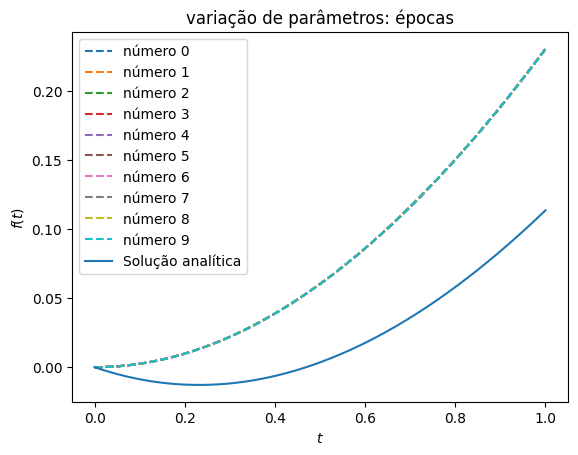

In [20]:
#teste de parâmetro 2 ordem: epocas
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
idx=0
fig, ax = plt.subplots(dpi=100)
while idx < 10:
  ## check if GPU is available and use it; otherwise use CPU
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  parametro_a_variar = [5, 10, 15, 20, 25, 30,35,40,45,50] 
  N = nn.Sequential(nn.Linear(1, 100), nn.Sigmoid(), nn.Linear(100,1, bias=False))
  print(parametro_a_variar[idx])
  A  = 0
  A2 = 0
  Psi_t = lambda x: A + A2*x + x ** 2 * N(x)
  f = lambda x,Xi,Psi:  1/2 - Xi/5 - Psi/5 #1/2 - Xi/2 - Psi/1                    
  def loss(x):

    x.requires_grad = True
    outputs = Psi_t(x)

    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs),
                                            create_graph=True)[0]
    Psi_t_x_x = torch.autograd.grad(Psi_t_x, x, grad_outputs=torch.ones_like(Psi_t_x),
                                            create_graph=True )[0]

    return torch.mean((Psi_t_x_x - f(x,outputs,Psi_t_x)) ** 2)


  optimizer = torch.optim.LBFGS(N.parameters())
  x = torch.Tensor(np.linspace(0, 1, 1000)[:, None])


  def closure():

    optimizer.zero_grad() #grad zerado para não gerar acumulações errôneas
    l = loss(x)
    l.backward()
    
    return l

  for i in range(parametro_a_variar[idx]):
    optimizer.step(closure)
    print(closure())
  xx = np.linspace(0, 1, 1000)[:, None]

  legenda_plot = "número " + str(idx)
  ax.plot(xx, yy, '--', label=legenda_plot)
  ax.set_xlabel('$t$')
  ax.set_ylabel('$f(t)$')
  idx=idx+1

with torch.no_grad():
    yy = Psi_t(torch.Tensor(xx)).numpy()
yt = 1/38 * np.exp(-xx/10) * (-np.sqrt(95)*np.sin( np.sqrt(19)*xx/10 ) - 95 * np.cos(np.sqrt(19)/10 * xx) + 95) # np.exp(-xx/2) * (np.exp(xx/2) - np.sin(xx/2) - np.cos(xx/2))
ax.plot(xx, yt, label='Solução analítica')
ax.set_title('variação de parâmetros: épocas')
plt.legend(loc='best');

tensor(14.8968, grad_fn=<MeanBackward0>)
tensor(13.4925, grad_fn=<MeanBackward0>)
tensor(12.1631, grad_fn=<MeanBackward0>)
tensor(10.9097, grad_fn=<MeanBackward0>)
tensor(9.7331, grad_fn=<MeanBackward0>)
tensor(8.6339, grad_fn=<MeanBackward0>)
tensor(7.6122, grad_fn=<MeanBackward0>)
tensor(6.6680, grad_fn=<MeanBackward0>)
tensor(5.8009, grad_fn=<MeanBackward0>)
tensor(5.0100, grad_fn=<MeanBackward0>)
tensor(0.2538, grad_fn=<MeanBackward0>)
tensor(0.1932, grad_fn=<MeanBackward0>)
tensor(0.2067, grad_fn=<MeanBackward0>)
tensor(0.2157, grad_fn=<MeanBackward0>)
tensor(0.2038, grad_fn=<MeanBackward0>)
tensor(0.1902, grad_fn=<MeanBackward0>)
tensor(0.1863, grad_fn=<MeanBackward0>)
tensor(0.1897, grad_fn=<MeanBackward0>)
tensor(0.1915, grad_fn=<MeanBackward0>)
tensor(0.1879, grad_fn=<MeanBackward0>)
tensor(63.0537, grad_fn=<MeanBackward0>)
tensor(59.6856, grad_fn=<MeanBackward0>)
tensor(56.4202, grad_fn=<MeanBackward0>)
tensor(53.2591, grad_fn=<MeanBackward0>)
tensor(50.2039, grad_fn=<MeanBac

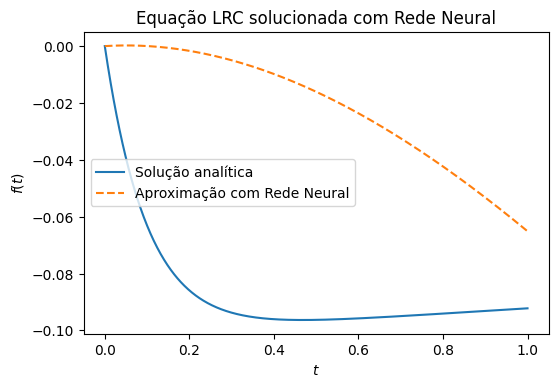

In [ ]:
#eq sistema
#from matplotlib.backend_bases import NavigationToolbar2
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

## check if GPU is available and use it; otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
iii=0
while iii < 100:
  N = nn.Sequential(nn.Linear(1, 50), nn.Sigmoid(), nn.Linear(50,1, bias=False))
  N2 = nn.Sequential(nn.Linear(1, 50), nn.Sigmoid(), nn.Linear(50,1, bias=False))

  A = 0.5
  A2 = 0

  Psi_t = lambda x: A + x * N(x)                 
  Psi_t_2 = lambda x: A2 + x * N2(x)             

  f = lambda x, Xi, Psi: Psi/2                         
  f2 = lambda x, Xi, Psi: - Xi/0.5 - Psi/0.1                 

                        
  def loss(x): 

      x.requires_grad = True

      outputs2 = Psi_t_2(x)
      outputs = Psi_t(x)
      Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs),
                          create_graph=True)[0]
      Psi_t_x_2 = torch.autograd.grad(outputs2, x, grad_outputs=torch.ones_like(outputs2),
                          create_graph=True)[0]

    #  print("loss:", torch.mean( ( Psi_t_x - hh )  ** 2))
      return  torch.mean( ( ( Psi_t_x - f(x,outputs,outputs2) )  ** 2) + ((Psi_t_x_2 - f2(x,outputs,outputs2)) ** 2) )
  optimizer = torch.optim.Adam(N.parameters())
  optimizer2 = torch.optim.Adam(N2.parameters())
  x = torch.Tensor(np.linspace(0, 1, 1000)[:, None])

  def closure():

      optimizer.zero_grad() #grad zerado para não gerar acumulações errôneas
      optimizer2.zero_grad()
      l = loss(x)
      l.backward()
      
      return l

  for i in range(10):
      print(closure())
      optimizer.step(closure)
      optimizer2.step(closure)
  xx = np.linspace(0, 1, 1000)[:, None]
  if closure() < 1e-4:
    print('Valor de perda sistema: época 9 :',closure().item())
    break
  iii=iii+1

with torch.no_grad():
    yy = Psi_t_2(torch.Tensor(xx)).numpy()
yt =  -1/(2*np.sqrt(24)) * np.exp(xx * (-5+np.sqrt(24)) ) + 1/(2*np.sqrt(24)) * np.exp(xx * (-5-np.sqrt(24)) ) #np.exp(-xx/10) * (np.exp(xx/10) - np.sin(xx/10) - np.cos(xx/10))     

fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label='Solução analítica')
ax.plot(xx, yy, '--', label='Aproximação com Rede Neural')
ax.set_xlabel('$t$')
ax.set_ylabel('$f(t)$')
ax.set_title('Equação LRC solucionada com Rede Neural')
plt.legend(loc='best');

Valor de perda primeira_ordem: época 0 : 0.014578675851225853
Valor de perda primeira_ordem: época 1 : 2.0421284663285633e-09
Valor de perda primeira_ordem: época 2 : 2.0421284663285633e-09
Valor de perda primeira_ordem: época 3 : 2.0421284663285633e-09
Valor de perda primeira_ordem: época 4 : 2.0421284663285633e-09
Valor de perda primeira_ordem: época 5 : 2.0421284663285633e-09
Valor de perda primeira_ordem: época 6 : 2.0421284663285633e-09
Valor de perda primeira_ordem: época 7 : 2.0421284663285633e-09
Valor de perda primeira_ordem: época 8 : 2.0421284663285633e-09
Valor de perda primeira_ordem: época 9 : 2.0421284663285633e-09
-----
Valor de perda segunda_ordem: época 0 : 0.9778974652290344
Valor de perda segunda_ordem: época 1 : 2.895835450544837e-06
Valor de perda segunda_ordem: época 2 : 2.895835450544837e-06
Valor de perda segunda_ordem: época 3 : 2.895835450544837e-06
Valor de perda segunda_ordem: época 4 : 2.895835450544837e-06
Valor de perda segunda_ordem: época 5 : 2.8958354

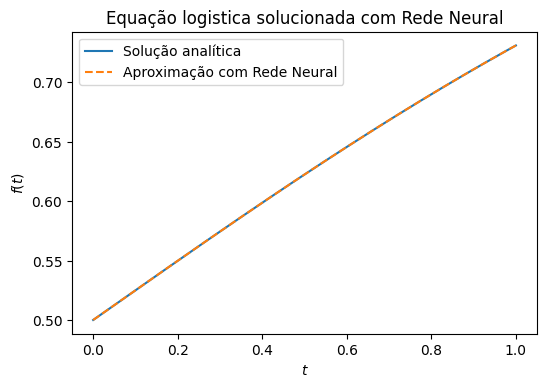

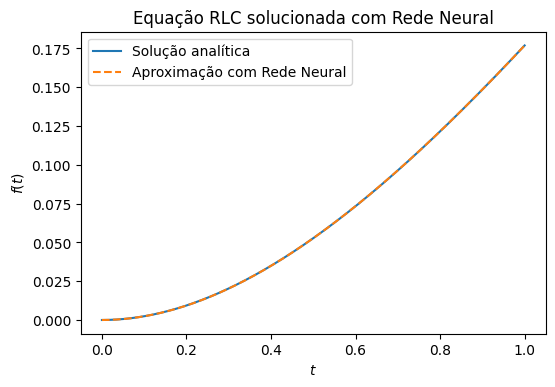

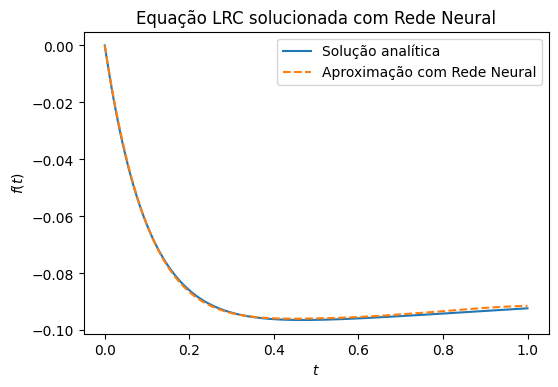

In [ ]:
#versao pro tcc

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
def resolver_edo(modo="primeira_ordem",cond=[0.5,0]):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  ##Checa se a GPU está disponível e a usa. Caso contrário, usa CPU

    N = nn.Sequential(nn.Linear(1, 50), nn.Sigmoid(), nn.Linear(50,1, bias=False))      #Rede neural com 3 camadas: Entrada 50 neurons, escondida sigmoide 50 neurons, saída 1 neuron
    if modo == "sistema":
        N2 = nn.Sequential(nn.Linear(1, 50), nn.Sigmoid(), nn.Linear(50,1, bias=False))  #Rede neural para o sistema de EDO

    A = cond[0]                  #condicao inicial 1 (em primeira e segunda ordem, phi(0))
    A2 = cond[1]                 #condicao inicial 2 (em segunda ordem, d phi(0) / dt )
    if modo == "primeira_ordem":
        Phi_t = lambda x: A + x * N(x)     #Estimativa de solução - 1 ordem
        f = lambda x,Phi: Phi*(1-Phi)      # eq diferencial na forma dy/dx = f(x,Phi)
    elif modo == "sistema":                 
        Phi_t_2 = lambda x: A2 + x * N2(x)   #estimativa de solução segunda eq.
        Phi_t = lambda x: A + x * N(x)       #estimativa de solução primeira eq.
        f = lambda x, Phi_1, Phi_2: Phi_2/2         #eq diferencial na forma dy1/dx = f1(x,Phi_1,Phi2)           
        f2 = lambda x, Phi_1, Phi_2: - Phi_1/0.5 - Phi_2/0.1      # #eq diferencial na forma dy2/dx = f2(x,Phi_1,Phi2)
    else:
        Phi_t = lambda x: A + A2*x + x ** 2 * N(x)  #estimativa de solução - 2 ordem
        f = lambda x,Phi,d_Phi:  1/2 - Phi/2 - d_Phi/1    #eq diferencial na forma d²y/dx² = f(x,Phi,d Phi/dx)

    def loss(x): 
        x.requires_grad = True        #Todas as operações com x terão o grad anotado
        if modo == "sistema":
            outputs2 = Phi_t_2(x)     #aplica x nas estimativas de solução
        outputs = Phi_t(x)
        Phi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs), create_graph=True)[0]  #calcula o grad de Phi_t (saída em relação a entrada)
        if modo == "sistema":
            Phi_t_x_2 = torch.autograd.grad(outputs2, x, grad_outputs=torch.ones_like(outputs2),create_graph=True)[0]   #Calcula o grad da segunda equação (saída em relação a entrada)
            return  torch.mean(  ( Phi_t_x - f(x,outputs,outputs2) )  ** 2 + (Phi_t_x_2 - f2(x,outputs,outputs2)) ** 2 )  #função de erro - sistema
        if modo == "segunda_ordem":
           Phi_t_x_x = torch.autograd.grad(Phi_t_x, x, grad_outputs=torch.ones_like(Phi_t_x),create_graph=True )[0]  #Calcula o grad de d Phi_t (saída em relação a entrada)
           return torch.mean(( Phi_t_x_x - f(x,outputs,Phi_t_x) ) ** 2)                                              #Função de erro - segunda ordem
        else:
            return  torch.mean( ( Phi_t_x - f(x,outputs) )  ** 2)                                                    #função de erro - primeira ordem

    otimizador = torch.optim.LBFGS(N.parameters())                                                                   #otimizador LBFGS
    if modo == "sistema":
        otimizador2 = torch.optim.LBFGS(N2.parameters())                                                             #Otimizador para a segunda rede neural

    x = torch.Tensor(np.linspace(0, 1, 1000)[:, None])                                                               #calcular a edo no intervalo [0,1]
    
    def closure():

        otimizador.zero_grad() #grad zerado para não gerar acumulações errôneas
        if modo == "sistema":
            otimizador2.zero_grad() #zera o grad do segundo otimizador no sistema
        l = loss(x)                 #chama a função loss para calcular a função de perda
        l.backward()                #caminha para trás no "graph" criado pela função torch.autograd.grad,
                                    #computando os gradientes em retropropagação
        return l

    for i in range(10):
        print("Valor de perda " + modo + ":", "época",i,":", closure().item())
        otimizador.step(closure)               #atualiza os parâmetros com base no valor de perda
        if modo == "sistema":
            otimizador2.step(closure)          #atualiza os parâmetros da segunda EDO com base no valor de perda
    print('-----')
    xx = np.linspace(0, 1, 1000)[:, None]      #domínio a plotar no gráfico

    with torch.no_grad():
        if modo=="sistema":
          yy = Phi_t_2(torch.Tensor(xx)).numpy()  #a informação desejada encontra-se na solução da segunda EDO do sistema
        else:
          yy = Phi_t(torch.Tensor(xx)).numpy()   #Calcula-se o resultado final da solução
    if modo == "primeira_ordem":
        yt = 1/(1+np.exp(-xx))                   #Resultado analítico - 1 ordem
        titulo = 'Equação logistica solucionada com Rede Neural'
    elif modo=="segunda_ordem":
        yt = np.exp(-xx/2) * (np.exp(xx/2) - np.sin(xx/2) - np.cos(xx/2)) #Resultado analítico - 2 ordem
        titulo = 'Equação RLC solucionada com Rede Neural'
    else:
        yt =  -1/(2*np.sqrt(24)) * np.exp(xx * (-5+np.sqrt(24)) ) + 1/(2*np.sqrt(24)) * np.exp(xx * (-5-np.sqrt(24)) ) #Resultado analítico - sistema
        titulo = 'Equação LRC solucionada com Rede Neural'
    fig, ax = plt.subplots(dpi=100)
    ax.plot(xx, yt, label='Solução analítica')                      #ajustes de plot
    ax.plot(xx, yy, '--', label='Aproximação com Rede Neural')
    ax.set_xlabel('$t$')
    ax.set_ylabel('$f(t)$')
    ax.set_title(titulo)
    plt.legend(loc='best');       #fim da função

condicoes_1_ordem = [0.5, 0]      #condição inicial - 1 ordem (segundo valor não usado)
condicoes_2_ordem = [0, 0]        #condição inicial - 2 ordem 
condicoes_sistema = [0.5, 0]      #condição inicial - sistema
resolver_edo("primeira_ordem", condicoes_1_ordem)    #aplica a função para primeira ordem com suas condições
resolver_edo("segunda_ordem",condicoes_2_ordem)      #aplica a função para segunda ordem com suas condições
resolver_edo("sistema", condicoes_sistema)           #aplica a função para o sistema com suas condições


True

1